<a href="https://colab.research.google.com/github/Brettbyers2005/CISC121-Assignment-1/blob/main/CISC121Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cisc 121 Assignment 3**

Brett Byers
001
20464377
Github link:

**Problem 1: Stacks - Daily Temperatures**

1. Understanding and Breakdown

Goal:
- When given a list of daily temperatures, how many days must one wait to get a warmer temperature. If there is not a future warmer day, 0 should be placed.

Input:
- Temperatures (a list of all the ones)
Output:
- (An answer) of how many days one must wait, output will be 0 if that day is not coming.

Constraints
- Length of temp (1<= len(temperatures) <= 100000
- The temp in genral (30 <= temperatures[i] <= 100

My Plan:
1. Create an (answer) filled with 0's same length as (temperatures)
2. Create emtpy stack that will store indicies
3. Go through every temp in the list one by one, check in the stack for those days, if earlier temp is warmer remove it and add this one. And calculate how many days it took to get to that temp. (answer[j] = i - j.
4. Return (answer) and indicies left stay at 0 which would mean no warmer days ahead.

Flow chart:

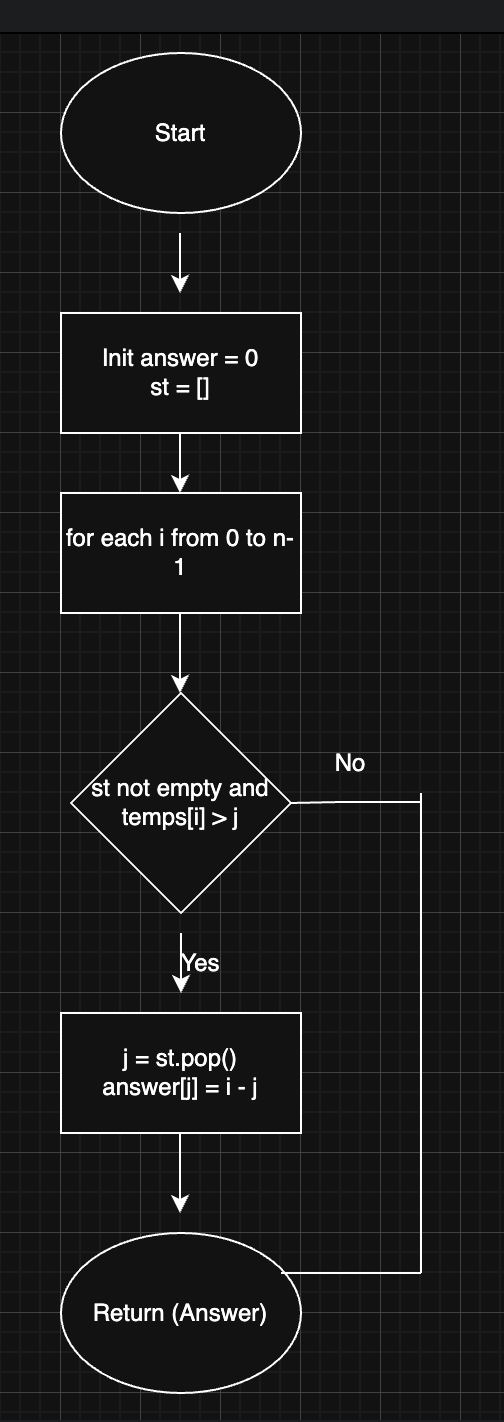

2. Peer Review & Draft Code

link: https://leetcode.com/problems/daily-temperatures/solutions/136017/elegant-python-solution-with-stack-by-jo-r6uk/

In [ ]:
def daily_temperatures(temperatures):
    #First we are creating the result list with 0.
    n = len(temperatures)
    answer = [0] * n
    stack = []

    #going through each day from the left to the right
    for i in range(0, n):
        current_temp = temperatures[i]


        #checking if a earlier warmer day exsists and seeing what the next warmer day is.
        while len(stack) > 0 and current_temp > temperatures[stack[-1]]:
            previous_index = stack.pop()
            wait_days = i - previous_index
            answer[previous_index] = wait_days
        #add curent day to index
        stack.append(i)
    return answer


    #Some inspiration I took from the code above:
    #I would have done this on my own but still liked how it filled answer lists with 0 for simpler logic
    #Loved how it used stacking to track days waiting for a warmer temp
    #Starting from the left using forward iteration


3. Final Correct Code

In [2]:
def daily_temperatures(temperatures):
    n = len(temperatures)
    answer = [0] * n
    stack = []

    for i, t in enumerate(temperatures):
        while stack and t > temperatures[stack[-1]]:
            j = stack.pop()
            answer[j] = i - j
        stack.append(i)
    return answer

#ChatGPT helped me with a few things for this final code and I will list them here:
#Used enumerate to get the index and value directly
#Simplified a few of the conditions for example, (while stack and ...) for overall readability and simplicity
#Edge cases covered still



Test cases:
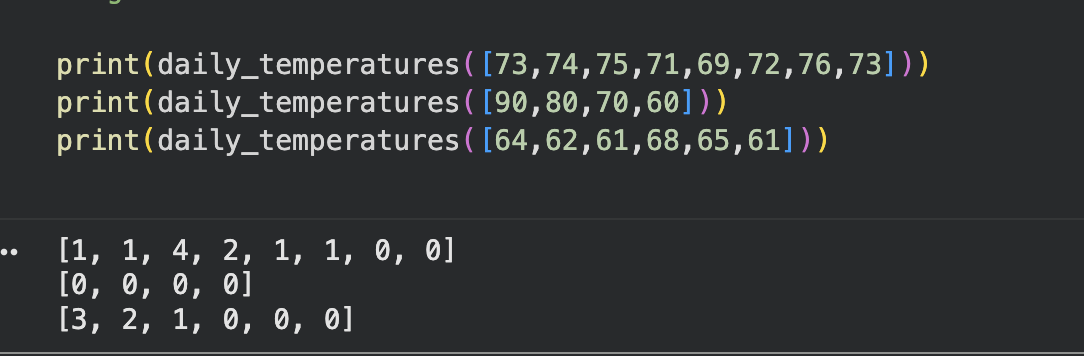

4. Review & Fixes

In [ ]:
#Fix 1: Simplified the loop using function enumeratre()

#Draft Version: More manual
for i in range(0, n):
    current_temp = temperatures[i]
    while len(stack) > 0 and current_temp > temperatures[stack[-1]]:
        previous_index = stack.pop()
        wait_days = i - previous_index
        answer[previous_index] = wait_days
    stack.append(i)

#Fixed Version: Much more cleaner
for i, t in enumerate(temperatures):
    while stack and t > temperatures[stack[-1]]:
        j = stack.pop()
        answer[j] = i - j
    stack.append(i)



#Fix 2: Simplified the (while) condition and variable names

#Draft Version: Redundant
while len(stack) > 0 and current_temp > temperatures[stack[-1]]:
    previous_index = stack.pop()
    wait_days = i - previous_index
    answer[previous_index] = wait_days

#Fixed Version: Clean and much more exact
while stack and t > temperatures[stack[-1]]:
    j = stack.pop()
    answer[j] = i - j


5. Reflection on my Contribution

1. One big thing I used ChatGPT for was making my final code cleaner by using the enumerate() function. I did not know really know about that tool before hand so using it helped out a ton.

2. I verified and made my own test cases for my final code to make sure it met all requirments it was supposed to make.

3. Though I had my logic correct in my own code I also used ChatGPT to see if there was anything I can do without in the code and overall shorten it to make it better.

**Problem 2: Queues - Number of Students Unable to Eat Lunch**

1. Understanding & Breakdown

The problem/Goal:
- Students are lining up in a "queue." Sandwiches are in a stack. At each step taken a student takes top sandwich only if they want it. Otherwise they go to back of the queue. This keeps going on loop until no one in queue wants top sandwhich and you return how many stduents do not want/cannot eat.

Input:
- students: students[0] front of queue
- sandwiches
- Lenths are equal (n students and n sandwiches)
Output:
- Integer: number of students left who cannot eat

Constraints:
- len(students) == len(sandwiches) == n
Values can only be 0 or 1

Plan:
1. Compute the counts from students
2. For each sandwich top to bottom:
- If s == 0 and count0 > 0: count0 -= 1 and continue.
- Elif s == 1 and count1 > 0: count1 -= 1 and continue.
- Else: break the loop
3. Return count0 + count1

Flow Chart:
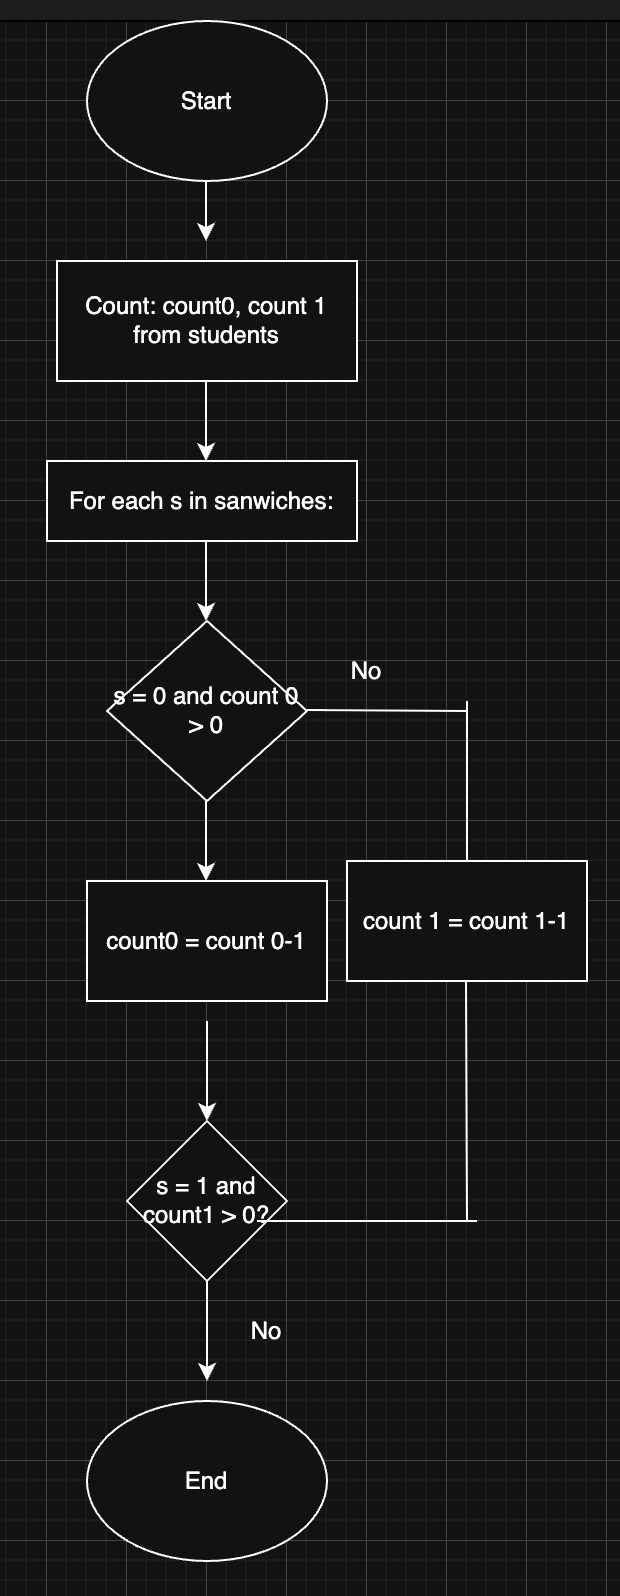

2. Peer Review & Draft Code

Link: https://leetcode.com/problems/number-of-students-unable-to-eat-lunch/solutions/2510921/python-queue-easy-approach-by-imparikalp-qc15/?envType=problem-list-v2&envId=queue

In [ ]:
def count_students_unable_to_eat(students, sandwiches):
    #count the preference of the students
    count0 = 0
    count1 = 0
    for pref in students:
        if pref == 0:
            count0 += 1
        else:
            count1 += 1
    #Go through each sandwich starting at top
    for s in sandwiches:
        if s == 0:
            if count0 > 0:
                count0 -= 1
            else:
                break
        else:
            if count1 > 0:
                count1 -= 1
            else:
                break
    #Return total students who couldnt eat.
    return count0 + count1


    #Some inspiration and ideas I took from the leetcode:
    #The early stop concept was really good
    #Did same input student and sandwiches but did a little bit of different structure for clarity
    #Implimented how the loop stops if no one can take a sandwich

3. Final Correct Code

In [5]:
def count_students_unable_to_eat(students, sandwiches):

    #defining constraints

    CIRCULAR = 0
    SQUARE = 1
    #counting how many students per sandwich type
    count0 = 0
    count1 = 0
    for pref in students:
        if pref == CIRCULAR:
            count0 += 1 #increment circular
        else:
            count1 += 1 #increment square

    for s in sandwiches: #going through sandwiches top to bottom
        if s == CIRCULAR:
            if count0 == 0:
                break
            count0 -= 1
        else:  # s == SQUARE
            if count1 == 0:
                break
            count1 -= 1
    #return how many stduents couldn't eat
    return count0 + count1


    #Some things AI (chatGPT) improved:
    #Added the named constraints circular and square, so the code this time around reads semantically
    #The early exit comes first, which makes the stop condition much more obvious
    #Overall consitencty and readabilty








Test cases:
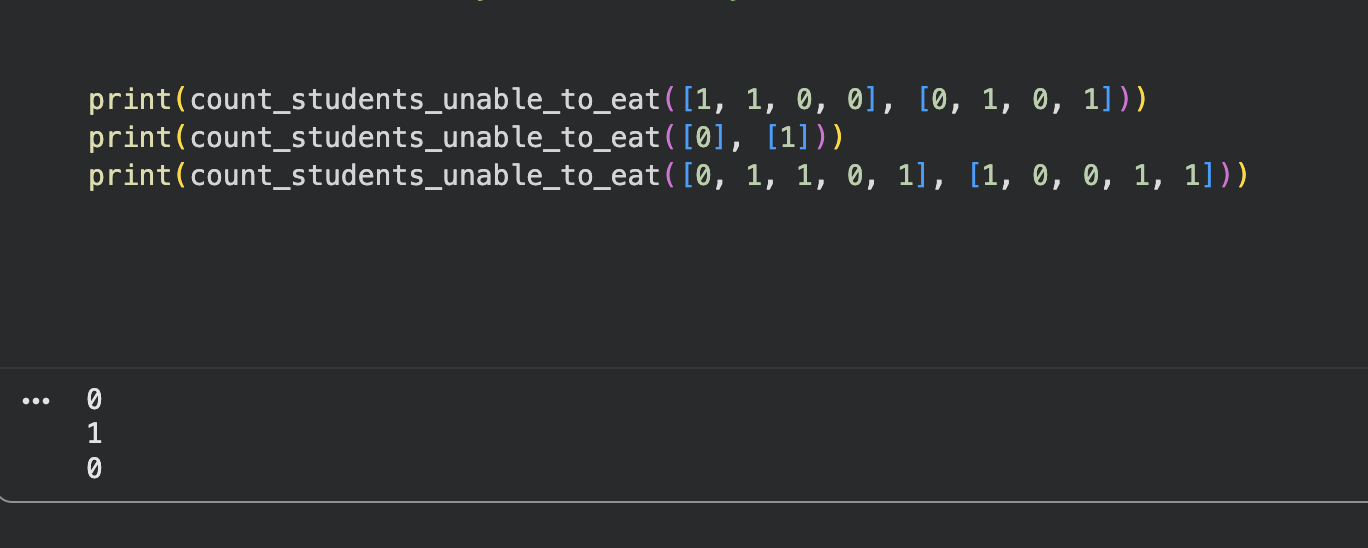

4. Review & Fixes

In [ ]:
#Fix 1: Replacing magic numbers with name constraints

#Draft Version: raw usage
if s == 0:
else:
if pref == 0:
    count0 += 1
else:
    count1 += 1

#Fixed version (Constraints that are improving readabilty)
CIRCULAR = 0
SQUARE = 1

if pref == CIRCULAR:
    count0 += 1
else:
    count1 += 1

if s == CIRCULAR:
else:


#Fix 2: Early break logic

#Draft Version: Nested check
if s == 0:
    if count0 > 0:
        count0 -= 1
    else:
        break

else:
    if count1 > 0:
        count1 -= 1
    else:
        break

#Fixed Version: Checking "no demand" first, then decrement
if s == CIRCULAR:
    if count0 == 0:
        break
    count0 -= 1

else:
    if count1 == 0:
        break
    count1 -= 1


5. Reflection on my Contribution

1. First thing that ChatGPT most obviousoly helped me with replacing the magic numbers with named constraints. I made sure to look over the logic myself but that fix helped a lot.

2. My original structure was independent, then with the leetcode motivation and AI's helped I was able to refine it.

3. All of my inline comments I did on my own as I don't feel you need much AI for those, though AI's inline comments are still good.

4. I was also using GPT to double check my edge cases, and I ran a few of those tests.

**Problem 3: Recursion - Climbing Stairs**

1. Understanding & Breakdown

Problem/Goal:
- Figuring out the different amount of ways you can climb to the top of the stair case with n steps. Each move lets you climb 1 or 2 steps at a time.

Input:
- Integer, n (total number of steps)
Output: Integer, repersenting the number of ways to reach the top.

Constraints:
- 1 <= n <= 45
- Order of steps matter and can only climb one or two steps at once

Plan:
1. To reach step n is sum of ways to take 1 and 2 steps.
2. some bases cases would be, if n=1, theres w1 way, if n=2, theres 2 ways.
3. Use loop/recursion to compute the rest.

Flow Chart:
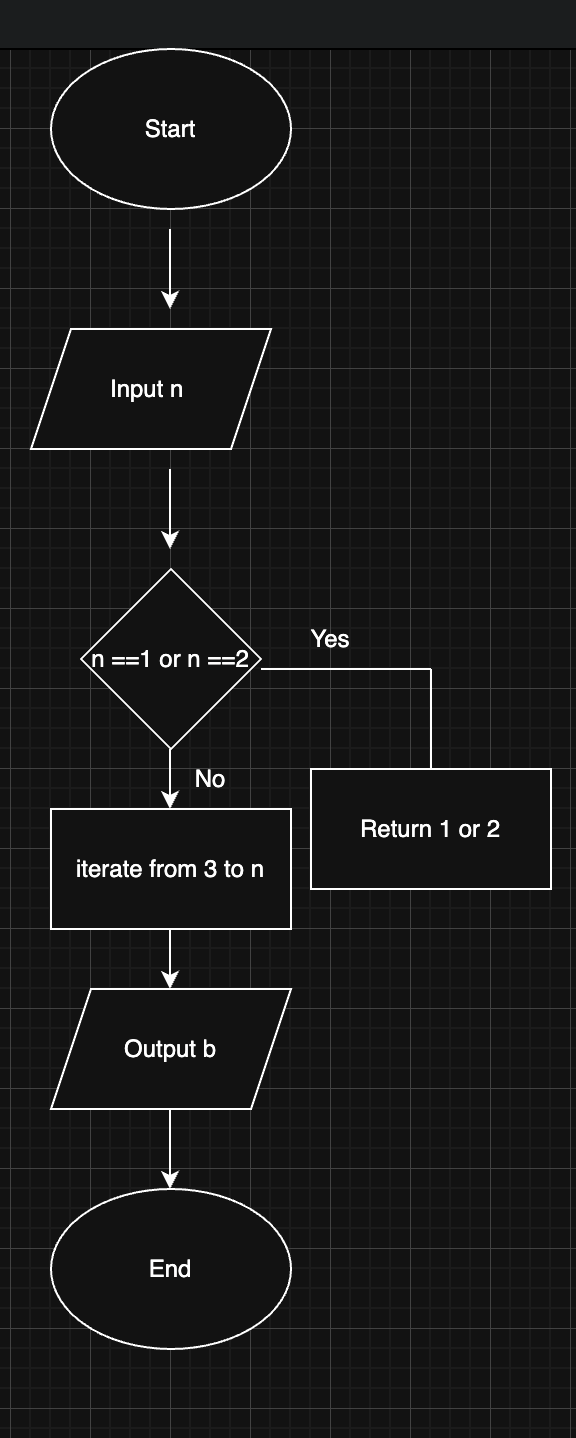

2. Peer Review & Draft Code

Link: https://leetcode.com/problems/climbing-stairs/solutions/3708750/4-methods-beats-100-c-java-python-beginn-bvot/

In [ ]:
def climb_stairs(n):
    #Base cases
    if n == 1:
        return 1
    if n == 2:
        return 2
    #using iteration to calculate
    one_step_before = 2
    two_steps_before = 1

    # Loop through remaining steps
    for i in range(3, n + 1):
        current = one_step_before + two_steps_before
        two_steps_before = one_step_before
        one_step_before = current

    # Final result
    return one_step_before


    #Inspiration I took from the leetcode solution:
    #I really liked how for the fibboncacci like sequence, they used recrusion to express the relationship
    #Kept same logical thought but ised iterative loop.
    #Also took inspiration in avoiding rebundant recursive calls.



4. Final Correct Code

In [2]:
def climb_stairs(n):
    # Handle small n directly
    if n <= 2:
        return n

    # prev2 = ways to reach i-2, prev1 = ways to reach i-1
    prev2, prev1 = 1, 2

    # Iterate from 3 to n using tuple-swap (no temp var needed)
    for _ in range(3, n + 1):
        prev2, prev1 = prev1, prev1 + prev2

    return prev1


  #As can be seen in the code AI(ChatGPT) made some big changes to my code so these are the ones it helped edit:
  #Firstly made some cleaner state names like prev1 and prev2
  #It merged the bases cases which I would of normally not thought of
  #Overall its the same complexity as my original code, but smaller.





Test Cases:
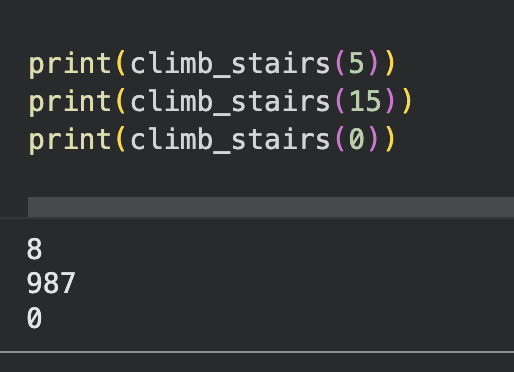

5. Reflection on my Contribution

1. In the begging I had some redundent calculations so GPT helped me realize I could use a iterative dynamic programming approach.
2. I manually tested the cases for my final correct code and to make sure the code was working properly.
3. Probably the biggest thing GPT helped me with was merging the base cases, as I was able to think of the original base cases on my own but merging made my code a lot more simple.

**Problem 4: Searching Problems - First Bad Version**

1. Understanding & Breakdown

Problem/Goal:
- Given n version (1 to n)
- Each software is sort of building off one another so once one is bad all the rest after are as well.
- Access to an API: isBadVersion(version) that returns True if the version is bad and False otherwise.

Input:
- int, total number of versions
- isBadVersion: returns true or false
Output:
- Integer of first bad version

Constraints:
- 1 <= bad <= n <= 2_31 - 1
- All versions after first are bad

Plan:
1. Set pointers (left = 1 & right = n)
2. When left is larger then right, find middle and with the function if its bad move right. If not move left.
3. By end of loop left will point to first bad version
4. Return left


Flow Chart (note** For this flow art I used AI level 1 to understand how to make one as I was stumped):

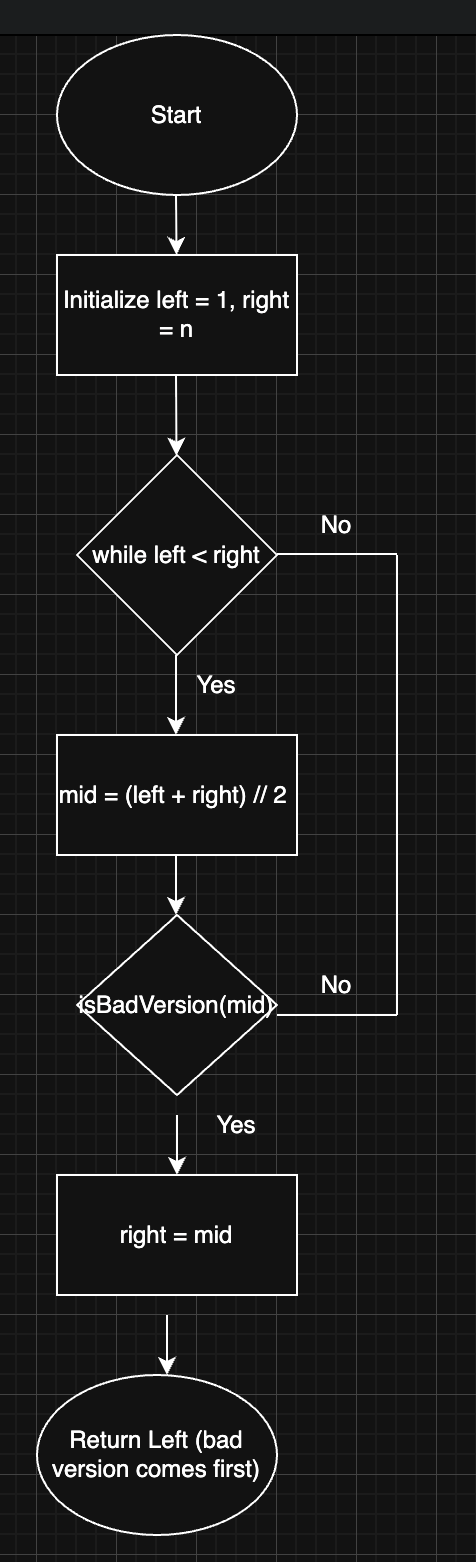

2. Peer Review & Draft Code

Link: https://leetcode.com/problems/first-bad-version/solutions/7291645/python-optimal-solution-by-behrooz_q-z3be/

In [3]:
#since isBadVersion is not automatically in collab adding it here
def isBadVersion(v):  # matches LeetCode name exactly
    return v >= FIRST_BAD

def first_bad_version(n):
    #full range of versions
    left, right = 1, n
    if isBadVersion(1):
        return 1
    #continuing search range
    while left < right:

        #finding middle version and if its bad
        mid = left + (right - left) // 2
        if isBadVersion(mid):
            right = mid
        else:
            left = mid + 1
    #When left == right first bad version has been found
    return left


    #Inspiration I took from the leet code:
    #Kept the same mid calculation
    #I liked how it used the binary windoow search pattern so I also added that into my own code
    #A personal tweak I made is the early exit I learned from earlier in the assignment




3. Final Correct Code

In [7]:
#Again implimenting this first as isn't auto on collab
#in the test cases first_bad is identified**
def isBadVersion(v: int) -> bool:  # matches LeetCode name exactly
    return v >= FIRST_BAD


def first_bad_version(n: int) -> int:
    #edge guard
    if isBadVersion(1):
        return 1

    left, right = 1, n
    while left < right:
        #computing middle this now avoid overflow with other languages
        mid = left + (right - left) // 2

        if isBadVersion(mid):
            #mid is bad
            right = mid
        else:
            #mid is good
            left = mid + 1

    #first bad version
    return left


    #Things AI(ChatGPT) helped/changed in this code:
    #The early guard was kept the same from my orignial code, but clarified
    #More consistent variable naming
    #Overall compared to other problems AI(GPT) probably helped me the last here in terms of the final correct code at least.



Test Cases:

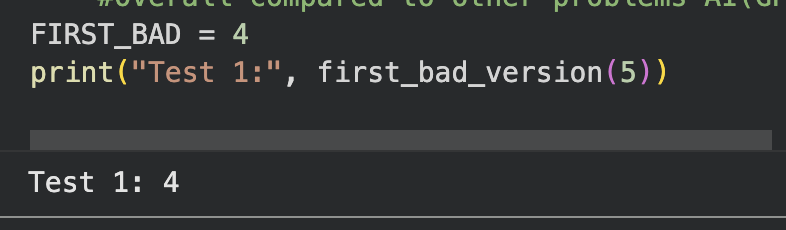

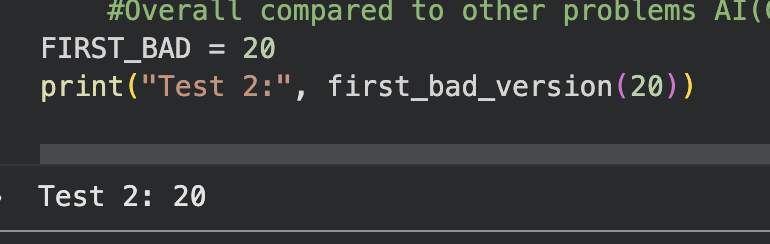

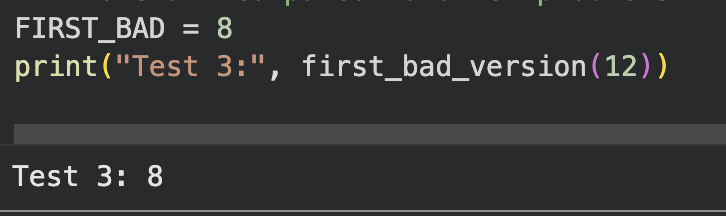

4. Review & Fixes

In [ ]:
#Fix 1: Early edge guard

#Draft Version: No early return
def first_bad_version(n):

    left, right = 1, n
    if isBadVersion(1):
        return 1

    while left < right:
        mid = left + (right - left) // 2
        if isBadVersion(mid):
            right = mid
        else:
            left = mid + 1
    return left

#Fixed Version: guard first instead and skip things not needed like the setup
def first_bad_version(n: int) -> int:

    if isBadVersion(1):
        return 1

    left, right = 1, n
    while left < right:
        mid = left + (right - left) // 2
        if isBadVersion(mid):
            right = mid
        else:
            left = mid + 1
    return left

#Fix 2: Improving clarity in the loops by removing the few redundent checks

#Draft Version: A little unclear logic
def first_bad_version(n):
    left, right = 1, n
    if isBadVersion(1):
        return 1
    while left < right:
        mid = left + (right - left) // 2
        if isBadVersion(mid):
            right = mid
        else:
            left = mid + 1
    return left

#Fixed Version: Overall better readability
def first_bad_version(n: int) -> int:

    left, right = 1, n

    while left < right:

        mid = left + (right - left) // 2

        if isBadVersion(mid):
            right = mid
        else:
            left = mid + 1

    return left


5. Reflection on my Contribution

1. GPT helped to make me realize the first bad function isn't automatically understood in python on google collab so I had to create a function that did the same thing which I was mostly able to sort through on my own
2. Understanding the concept here again I used GPT for a lot of my overall code and test cases more so on this code then others I was able to work through on my own
3. GPT throughout though did help me with cleaning up my code a bit and making it read better

**Problem 5: Sorting Problems - Sort Colors**

1. Understanding & Breakdown

Problem/Goal:
- We are given an arry nums with only 0, 1, 2 (red, white, blue). We have to sort it so that 0 comes first, then 1 and 2. With no library sort which will of course be a constraint.

Input:
- Nums, a list of length n, with the values listed above
Output:
- Sorted nums, in place.

Constraints:
- No library sort
- 1 <= n <= 300
- nums, must be 0,1,2

Plan:
1. Count the number of 0, 1s, and 2s.
2. Overwrite the array with the amount of the values.
3. Simple and robust

Flow Chart:

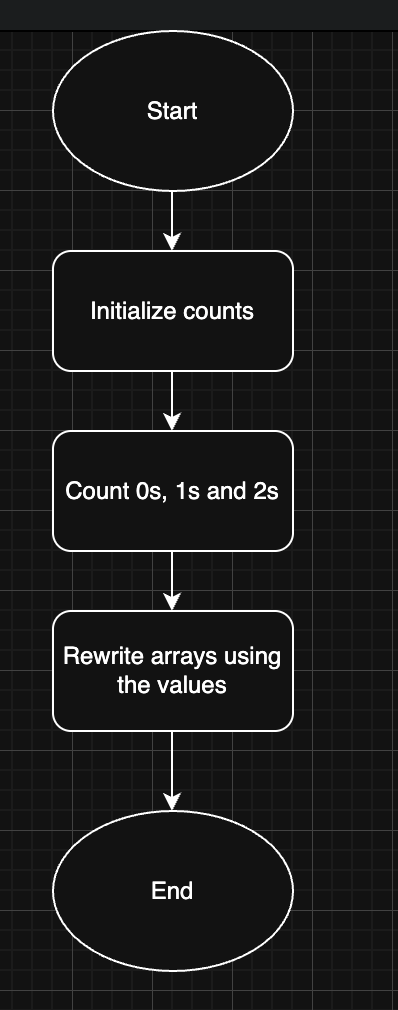

2. Peer Review & Draft Code

Link: https://leetcode.com/problems/sort-colors/solutions/3164333/solution-by-deleted_user-22pa/

In [ ]:
def sort_colors(nums):

    #counting how many of each color we have
    count_red = 0
    count_white = 0
    count_blue = 0

    for color in nums:
        if color == 0:
            count_red += 1
        elif color == 1:
            count_white += 1
        else:
            count_blue += 1

    #overwriting the number based on the counts
    i = 0

    #fill red
    for _ in range(count_red):
        nums[i] = 0
        i += 1

    #fill white
    for _ in range(count_white):
        nums[i] = 1
        i += 1

    #fill blue
    for _ in range(count_blue):
        nums[i] = 2
        i += 1


    return nums

    #Some inspiration I took from the leetcode:
    #The function name as can be seen
    #Simple integer indicies in same list
    #The in place idea as well I liked so used.



3. Final Correct Code

In [9]:
def sort_colors(nums):
    """
    Sort a list of 0 (red), 1 (white), and 2 (blue) in-place
    using counting sort. Returns nums for easier testing.
    """
    # Use named constants instead of magic numbers
    RED, WHITE, BLUE = 0, 1, 2

    #edge guard (not just for leetcode)
    if not nums:
        return nums

    #counting phase
    count_red = 0
    count_white = 0
    count_blue = 0

    for color in nums:
        if color == RED:
            count_red += 1
        elif color == WHITE:
            count_white += 1
        else:
            count_blue += 1


    i = 0 #overwrite: current index we are filling

    #reds (0s)
    for _ in range(count_red):
        nums[i] = RED
        i += 1

    #whites (1s)
    for _ in range(count_white):
        nums[i] = WHITE
        i += 1

    #blues (2s)
    for _ in range(count_blue):
        nums[i] = BLUE
        i += 1


    return nums


    #What AI(ChatGPT) helped me with in making the final correct code:
    #Naming constraints instead of using magic numbers
    #Adding clearer comments and even a docstring.
    #Also the edge guard for empty input




Test Cases:

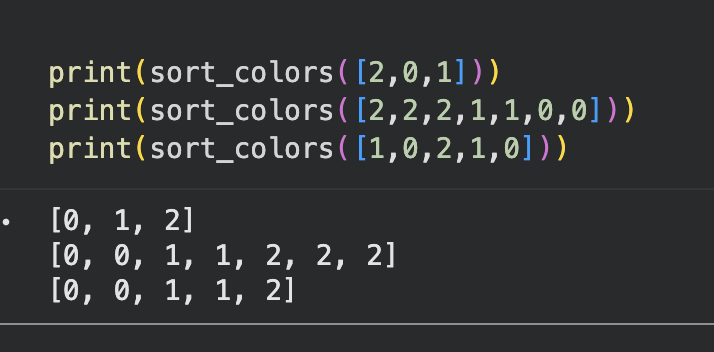



4. Review & Fixes

In [ ]:
#Fix 1: Replacing magic number with named constraints

#Draft Version: Magic numbers
for color in nums:
    if color == 0:
        count_red += 1
    elif color == 1:
        count_white += 1
    else:
        count_blue += 1

for _ in range(count_red):
    nums[i] = 0
    i += 1
for _ in range(count_white):
    nums[i] = 1
    i += 1
for _ in range(count_blue):
    nums[i] = 2
    i += 1

#Fixed Version: Named Constraints (makes it less prone to errors)
RED, WHITE, BLUE = 0, 1, 2

for color in nums:
    if color == RED:
        count_red += 1
    elif color == WHITE:
        count_white += 1
    else:
        count_blue += 1

for _ in range(count_red):
    nums[i] = RED
    i += 1
for _ in range(count_white):
    nums[i] = WHITE
    i += 1
for _ in range(count_blue):
    nums[i] = BLUE
    i += 1


#Fix 2: Adding edge guard

#Draft Version: No empty-list guard
    count_red = 0
    count_white = 0
    count_blue = 0

    for color in nums:
        ...
    i = 0
    #fill red
    for _ in range(count_red):
        nums[i] = 0
        i += 1

#Fixed Version: Guard added, so handles empty inputs
    if not nums:
        return nums




5. Reflection on my Contribution


1. Firstly the test cases as with most of the problems I came up with on my own to make sure my function was working properly.

2. I was using magic numbers orignally as "constraints," but GPT assisted in making me used names constraints instead. Which is more effective for readability.

3. I had some of my own comments throughout the draft code but this question more then others GPT helped me with almost all my comments just to make them a bit more clear.

4. All the else, if, logic ect I came to on my own as it is easy to understand and do and is in most functions.

**------------------**

- Brett Byers
- 001
- 20464377
- Github link:
